# MNIST 784 Handwriting Recognition with SKLearn Logistic Regression model

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
mnist = fetch_openml("mnist_784")

In [9]:
mnist.data.shape #70000 digits and 784 class

(70000, 784)

In [69]:
mnist.target #label corresponding to the image

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [70]:
print(mnist.target)

['5' '0' '4' ... '4' '5' '6']


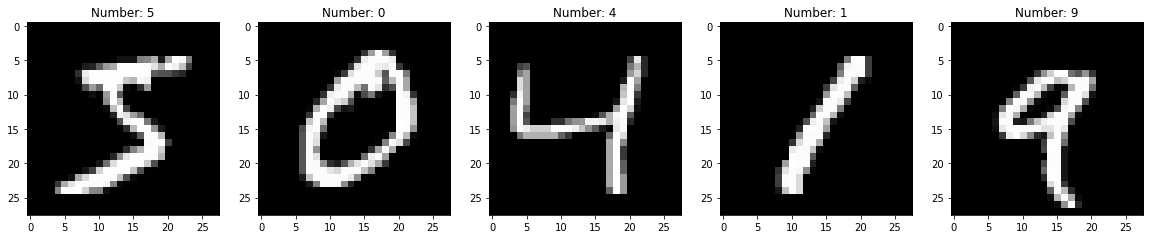

In [71]:
plt.figure(figsize=(20, 4))
for index,(image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28, 28)), cmap="gray")
    plt.title("Number: %s" % label)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [73]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(x_train, y_train)
predictions = mdl.predict(x_test)
score = mdl.score(x_test, y_test)
print(score)

0.9162857142857143


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction: 0


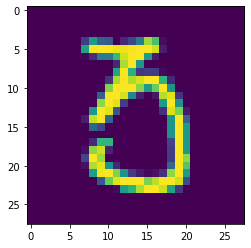

In [74]:
index = 3
plt.imshow(np.reshape(x_test[index], (28, 28)))
print("Prediction: "+mdl.predict([x_test[index]])[0])

In [75]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1327,    1,    4,    1,    3,   14,    8,    5,    7,    2],
       [   0, 1519,    7,    2,    1,    5,    3,    4,   14,    4],
       [   5,   21, 1319,   18,    9,    7,   18,   19,   51,    4],
       [   8,    4,   38, 1243,    0,   43,    3,   15,   31,    9],
       [   5,    5,    9,    4, 1337,    0,   16,    3,   14,   55],
       [  12,    7,   15,   51,    9, 1070,   28,    5,   42,   18],
       [  10,    3,   21,    1,    6,   15, 1285,    2,    6,    1],
       [   4,    6,   18,    8,   15,    3,    1, 1314,    6,   54],
       [  10,   26,   20,   30,    6,   41,    6,    8, 1169,   15],
       [  14,    8,    3,   21,   44,    9,    0,   36,    9, 1245]],
      dtype=int64)

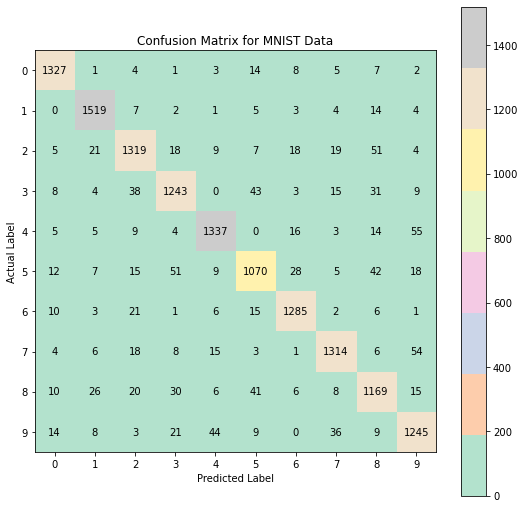

In [79]:
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap='Pastel2')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center')